# HETROSCEDASTICITY

- Unequal scatter of residual
- When the assumption of CLRM ( residuals have the same variance) is not met. 
- It is a problem beacause OLS regression assumes that all residuals are drawn from a population that has a constant variance.To satisfy this assumption, residuals should have constant variance.

### `Reasons:`
    - presense of outliers
    - observations are mixed with different measures of scale
    - incorrect trasformation of data is used to perform regression
    
### `Effects:`
    - OLS estimators are no longer BLUE and their variance is not lowest of all other unbiased estimators.
    - Estimators are no longer best.

### ABOUT DATASET

- name : mtcars
- It contains 32 observations on 11 variables.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy import stats
from scipy.stats import spearmanr

## `IMPORTING THE DATA`

In [2]:
df = pd.read_excel("C:/Users/HP/OneDrive/Desktop/ECON_EXAM/mtcars.xlsx")
print(df.columns)

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')


In [3]:
df_model = ols('mpg ~ cyl + disp + hp + drat + wt + qsec + vs + am + gear + carb' , data = df).fit()
df_model.summary()
res = df_model.resid
res_2 = res**2
mpg_cap = df_model.predict()

## DETECTION OF HETROSCEDASTICITY

**There are two ways to detect hetroscedasticity.**
1. Informal Methods
    - Graphical Method
2. Formal Methods
    - Park test
    - Spearman's rank correlation
    - Goldfeld - Quandt test
    - Breusch - pagan - goldfrey test
    - White test

### `GRAPHICAL METHOD`

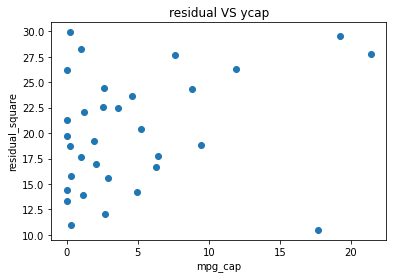

In [4]:
plt.figure()
plt.title('residual VS ycap')
plt.scatter(res_2,mpg_cap)
plt.ylabel('residual_square')
plt.xlabel('mpg_cap')
plt.show()

Above graph exibit definite patterns.So, we can say that may be hetroscedasticity is present in the data.

`HYPOTHESIS`

H0 : Homoscedasticity is present in the data.

H1 : Hetroscedasticity is present in the data.


In [5]:
def test_model(col):
    s=[]
    for i in col:
        a = [1,i]
        s.append(a)
    return(np.array(s))
prof_model = test_model(df['mpg'])

### `BPG TEST`

In [6]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(df_model.resid, prof_model)
print('BPG - test p-value',round(bp_test[1],7))
if bp_test[1] <= 0.05:
    print("we reject H0 at 5% level of significance and conclude that Hetroscedasticity is present in the data.")
else:
    print("we do not reject H0 at 5% level of significance and conclude that Homoscedasticity is present in the data.")

BPG - test p-value 0.0233032
we reject H0 at 5% level of significance and conclude that Hetroscedasticity is present in the data.


### `WHITE TEST`

In [7]:
from statsmodels.stats.diagnostic import het_white
white_test = het_white(df_model.resid,prof_model)
print('white test p value :',round(white_test[1],4))
if white_test[1] <= 0.05:
    print("we reject H0 at 5% level of significance and conclude that Hetroscedasticity is present in the data.")
else:
    print("we do not reject H0 at 5% level of significance and conclude that Homoscedasticity is present in the data.")

white test p value : 0.0133
we reject H0 at 5% level of significance and conclude that Hetroscedasticity is present in the data.


### `GOLDFLED - QUANDT TEST`

In [8]:
y = df["mpg"]
X = df.iloc[:,2:]

In [9]:
from statsmodels.stats.diagnostic import het_goldfeldquandt
goldfeldquandt_test = het_goldfeldquandt(y,X)
print('GQ test p value :',round(goldfeldquandt_test[1],4))
if goldfeldquandt_test[1] <= 0.05:
    print("we reject H0 at 5% level of significance and conclude that Hetroscedasticity is present in the data.")
else:
    print("we do not reject H0 at 5% level of significance and conclude that Homoscedasticity is present in the data.")

GQ test p value : 0.0366
we reject H0 at 5% level of significance and conclude that Hetroscedasticity is present in the data.


## REMEDIAL MEASURES FOR HETROSCEDASTICITY

### `lOG TRANSFORMATION`

BP test With Log transformation p-value 0.3138
we do not reject H0 at 5% level of significance and conclude that Homoscedasticity is present in the data.


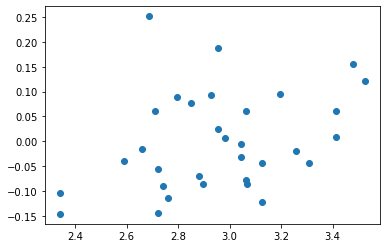

In [10]:
df['log_mpg'] = np.log(df['mpg'])
f = 'log_mpg ~ cyl + disp + hp + drat + wt + qsec + vs + am + gear + carb'
df_model2 = ols(f,data = df).fit()
df_model2.summary()

plt.figure()
plt.scatter(df.log_mpg, df_model2.resid)


log_model2 = test_model(df['log_mpg'])
bp_test2 = het_breuschpagan(df_model2.resid, log_model2)
print('BP test With Log transformation p-value',round(bp_test2[1],4))
if bp_test2[1] <= 0.05:
    print("we reject H0 at 5% level of significance and conclude that Hetroscedasticity is present in the data.")
else:
    print("we do not reject H0 at 5% level of significance and conclude that Homoscedasticity is present in the data.")


### ` BOX-COX TRASFORMATION`

BP test With Box-cox p-value 0.4662074
we do not reject H0 at 5% level of significance and conclude that Homoscedasticity is present in the data.


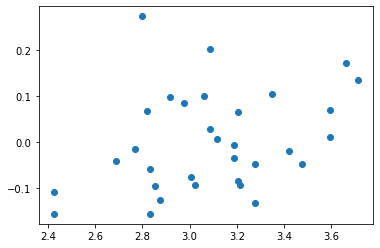

In [11]:
x,_ = stats.boxcox(df['mpg'])
df['trans_mpg'] = x
f = 'trans_mpg ~ cyl + disp + hp + drat + wt + qsec + vs + am + gear + carb'
df_model3 = ols(f, data = df).fit()
df_model3.summary()

plt.figure()
plt.scatter(df.trans_mpg, df_model3.resid)

trans_mpg_model = test_model(df['mpg'])
bp_test3 = het_breuschpagan(df_model3.resid, trans_mpg_model)
print('BP test With Box-cox p-value',round(bp_test3[1],7))

if bp_test3[1] <= 0.05:
    print("we reject H0 at 5% level of significance and conclude that Hetroscedasticity is present in the data.")
else:
    print("we do not reject H0 at 5% level of significance and conclude that Homoscedasticity is present in the data.")
